# Checkout statistical features of Spiral data 

### Import necessary  packages

In [1]:
import cv2
import numpy as np
import os
from skimage.morphology import skeletonize
from skimage.morphology import closing, square
from PIL import Image
import matplotlib.pyplot as plt
from utils import thin_spiral_image_with_custom_cut, find_spiral_point, \
         trace_spiral, get_angle_dist2, angle_cont_func
from numba.typed import List
from time import perf_counter
from scipy import signal
from sklearn.linear_model import LinearRegression
from scipy.ndimage import gaussian_filter1d

### Path to the data

In [2]:
path = r'C:\Users\Baumann\Documents\UU\03_semester\AIA\project\data'

### Import all files from path

In [3]:
names = []
trace_distances_all = []
trace_angle_all = []
all_paths = []

for file_path in os.listdir(path):
    print(file_path)
    # make sure file is .tiff
    if not file_path[-5:] == '.tiff':
        print('file was skipped')
        continue
    # create skeleton
    img, cut_img_cropped, skeleton_img_cropped = thin_spiral_image_with_custom_cut(
        path + '\\' + file_path, 
        white_out=True,  
        field_of_interest=[(57, -81), (122, -91)])

    # find center/start_point of the spiral
    spiral_start = find_spiral_point(skeleton_img_cropped, point=(0, 0), first=True, search_radius=200)
    if not spiral_start:
        print('not possible to extract')
        plt.imshow(img)
        plt.show()
        continue
    # follow the start point through the spiral
    skeleton_img_trace = skeleton_img_cropped.copy()
    trace_path = trace_spiral(skeleton_img_trace, spiral_start, search_radius=200)
    trace_path_typed = List()
    [trace_path_typed.append(i) for i in trace_path]

    # turn the coordinates in angle and distance for an alternative representation
    trace_angle, trace_distances = get_angle_dist2(trace_path_typed)
    
    trace_angle_all.append(trace_angle)
    trace_distances_all.append(trace_distances)
    names.append(file_path)
    all_paths.append(trace_path)

control1.tiff
control10.tiff
control11.tiff
control12.tiff
control13.tiff
control14.tiff
control15.tiff
control2.tiff
control3.tiff
control4.tiff
control5.tiff
control6.tiff
control7.tiff
control8.tiff
control9.tiff
control_dynamic1.tiff
control_dynamic10.tiff
control_dynamic11.tiff
control_dynamic12.tiff
control_dynamic13.tiff
control_dynamic14.tiff
control_dynamic15.tiff
control_dynamic2.tiff
control_dynamic3.tiff
control_dynamic4.tiff
control_dynamic5.tiff
control_dynamic6.tiff
control_dynamic7.tiff
control_dynamic8.tiff
control_dynamic9.tiff
parkinson1.tiff
parkinson10.tiff
parkinson11.tiff
parkinson12.tiff
parkinson13.tiff
parkinson14.tiff
parkinson15.tiff
parkinson16.tiff
parkinson17.tiff
parkinson18.tiff
parkinson19.tiff
parkinson2.tiff
parkinson20.tiff
parkinson21.tiff
parkinson22.tiff
parkinson23.tiff
parkinson24.tiff
parkinson25.tiff
parkinson3.tiff
parkinson4.tiff
parkinson5.tiff
parkinson6.tiff
parkinson7.tiff
parkinson8.tiff
parkinson9.tiff
parkinson_dynamic1.tiff
parkinso

## Squared Distance from the starting point 

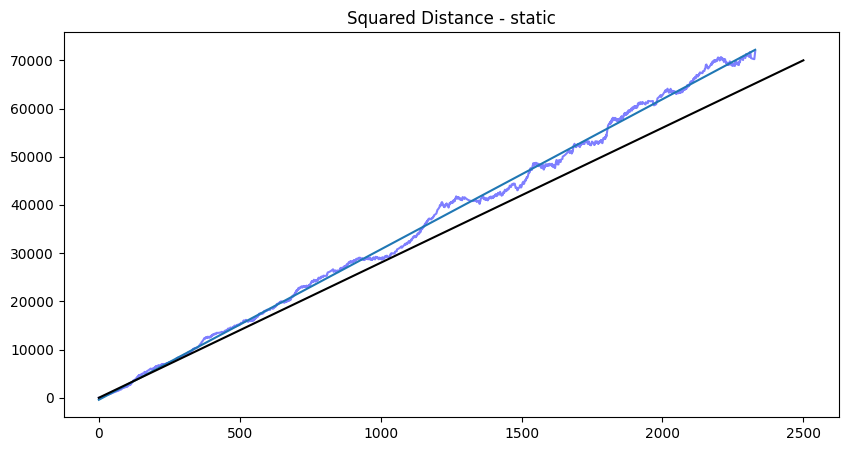

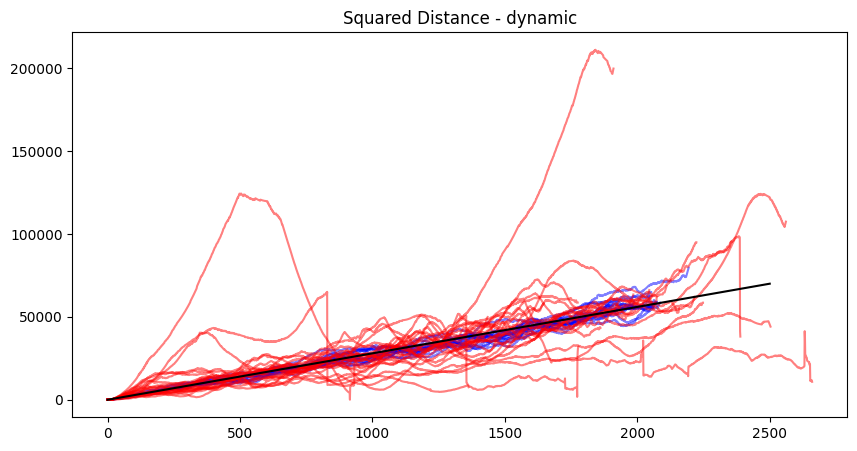

In [4]:

plt.figure(figsize=(10, 5))
for i, j in zip(trace_distances_all, names):
    if not 'dynamic' in j:
        color = 'red' if 'parkinson' in j else 'blue'
        x = np.array([k for k in range(len(i))]).reshape((-1, 1))
        reg = LinearRegression().fit(x, i)
        pred = reg.predict(x)
        if 'control3' in j: 
            plt.plot(i, c=color, alpha=0.5)
            plt.plot(pred)
plt.title('Squared Distance - static')
plt.plot([0,2500], [0,70000], 'k')
plt.show()

plt.figure(figsize=(10, 5))
for i, j in zip(trace_distances_all, names):
    if 'dynamic' in j:
        color = 'red' if 'parkinson' in j else 'blue'
        plt.plot(i, c=color, alpha=0.5)
plt.title('Squared Distance - dynamic')
plt.plot([0,2500], [0,70000], 'k')

## Squared Angle

In [5]:
trace_angle_continuous = angle_cont_func(trace_angle_all)


Text(0.5, 1.0, 'Squared Angle - dynamic')

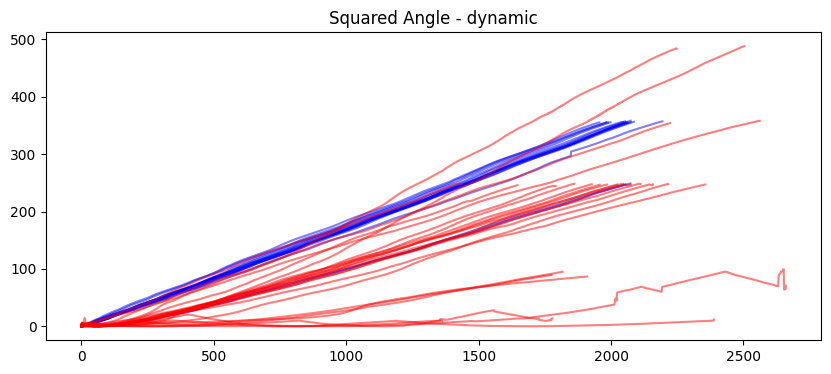

In [6]:

plt.figure(figsize=(10, 4))
for i, j in zip(trace_angle_continuous, names):
    if not 'dynamic' in j:
        color = 'red' if 'parkinson' in j else 'blue'
        i = [k*k for k in i] 
        #i = signal.resample(i, 2500)
        plt.plot(i, c=color, alpha=0.5)
plt.title('Squared Angle - static')
#plt.yscale('log')
plt.show()

plt.figure(figsize=(10, 4))
for i, j in zip(trace_angle_continuous, names):
    if 'dynamic' in j:
        color = 'red' if 'parkinson' in j else 'blue'
        i = [k*k for k in i] 
        #i = signal.resample(i, 2500)
        plt.plot(i, c=color, alpha=0.5)
plt.title('Squared Angle - dynamic')

## Reversed angle

In [7]:
angles_reversed = angle_cont_func([list(reversed(i)) for i in trace_angle_all])

In [8]:
plt.figure(figsize=(10, 4))
for i, j in zip(angles_reversed, names):
    if not 'dynamic' in j:
        color = 'red' if 'parkinson' in j else 'blue'
        #i = [k*k for k in i] 
        plt.plot(i, c=color, alpha=0.5)
plt.title('Angle reversed - static')
#plt.yscale('log')
plt.show()

plt.figure(figsize=(10, 4))
for i, j in zip(angles_reversed, names):
    if 'dynamic' in j:
        color = 'red' if 'parkinson' in j else 'blue'
        #i = [k*k for k in i] 
        plt.plot(i, c=color, alpha=0.5)
plt.title('Angle reversed - dynamic')

Text(0.5, 1.0, 'Angle reversed - dynamic')

## All Spirals that were extracted

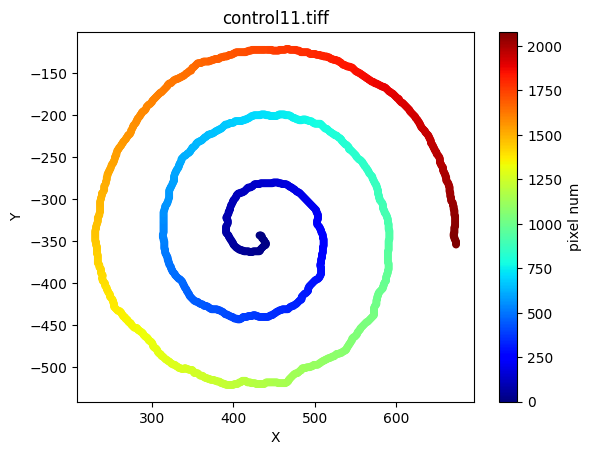

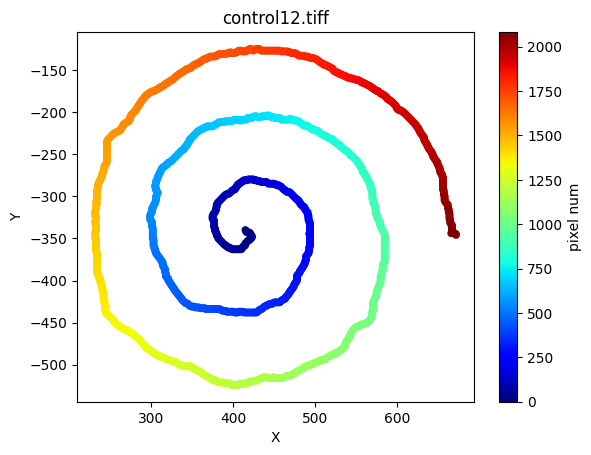

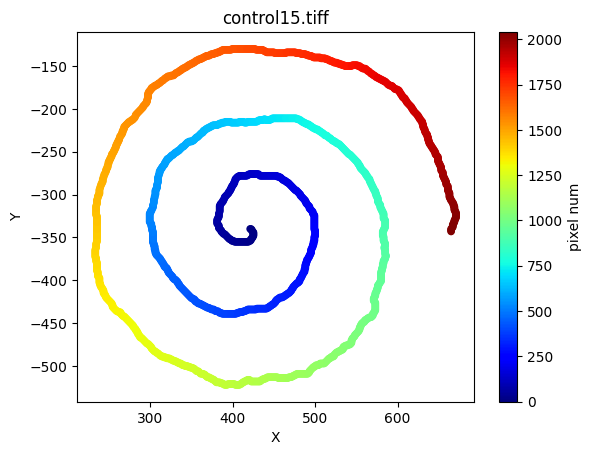

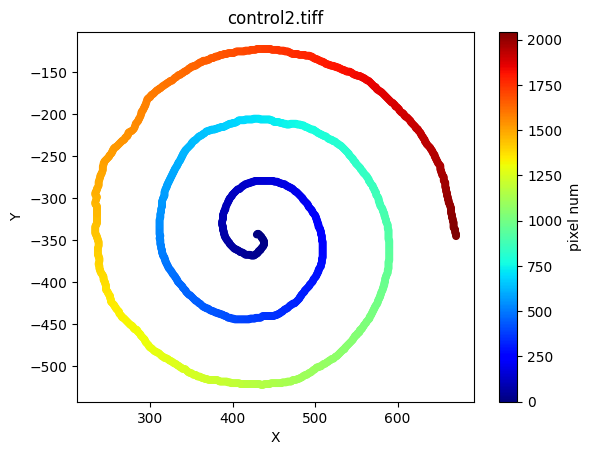

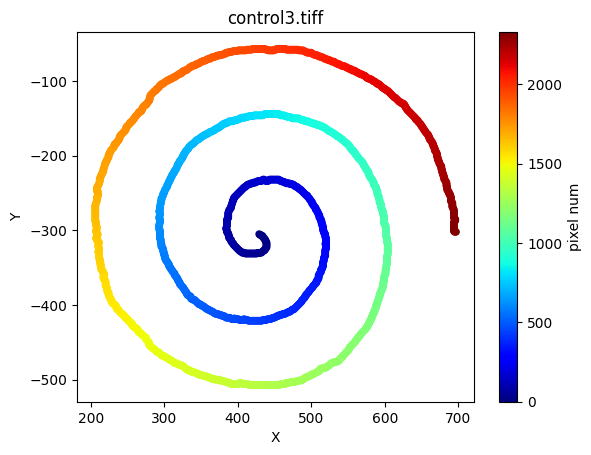

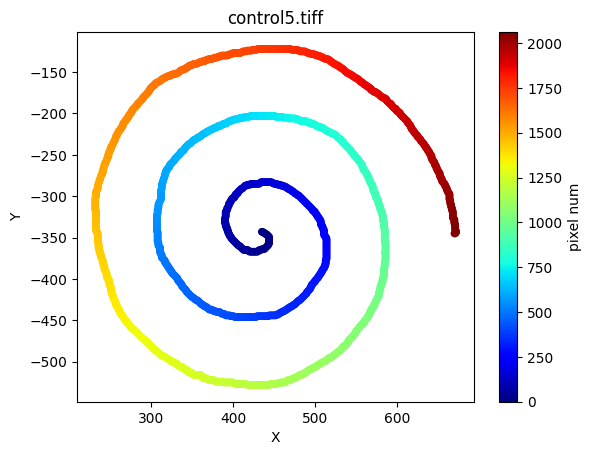

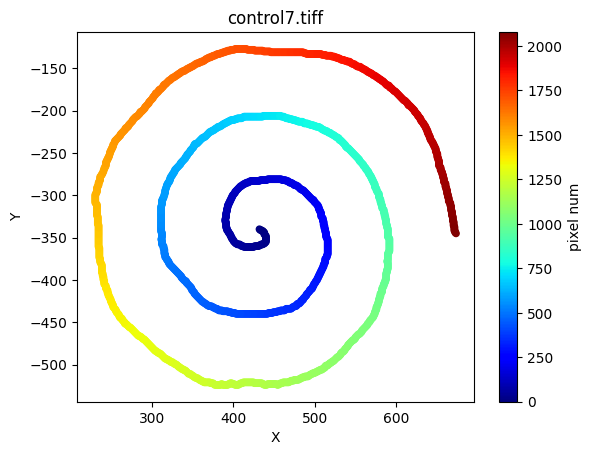

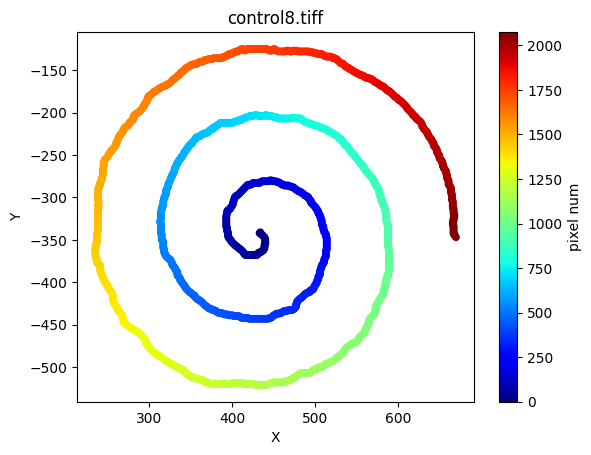

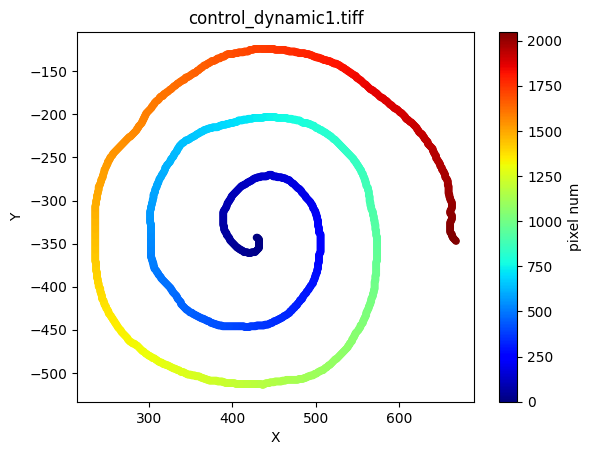

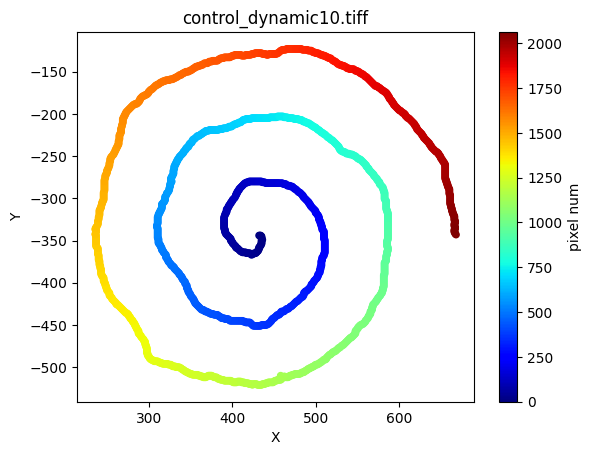

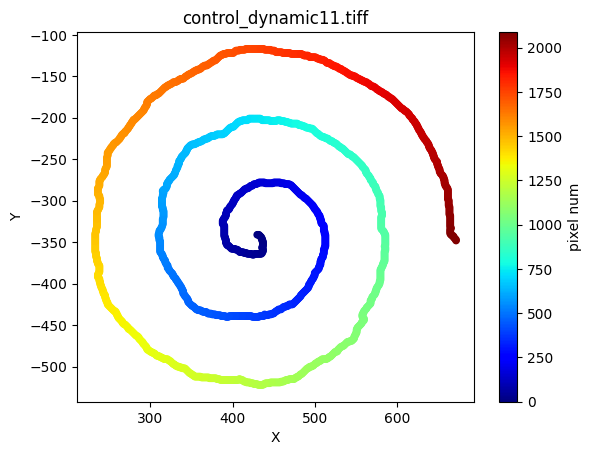

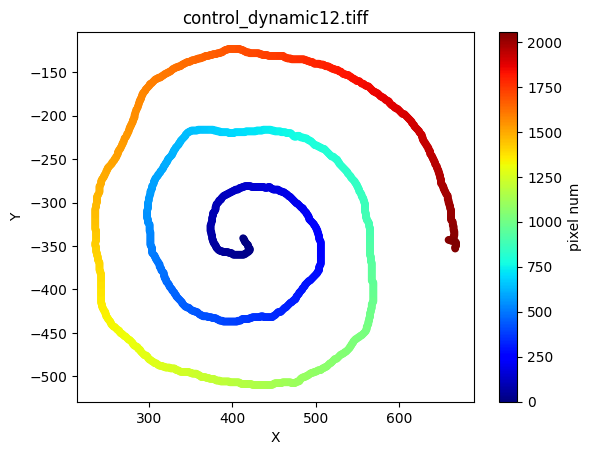

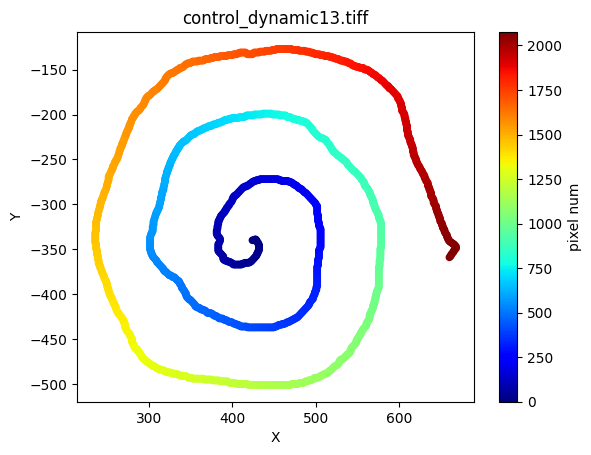

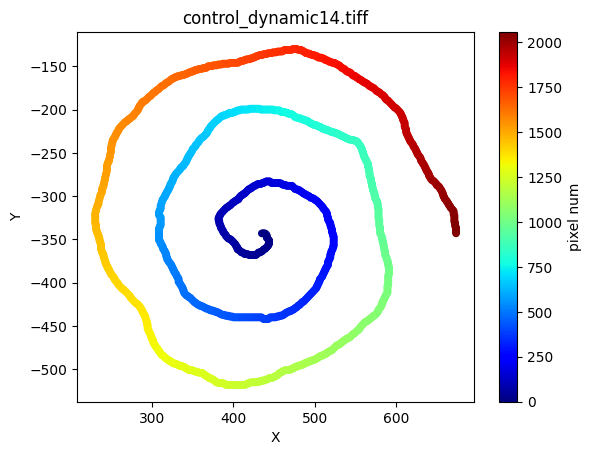

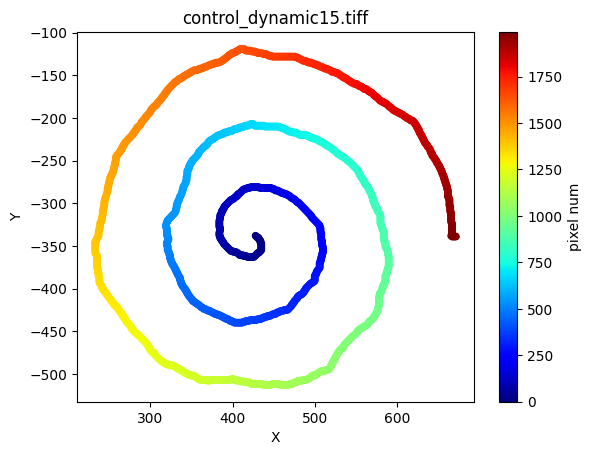

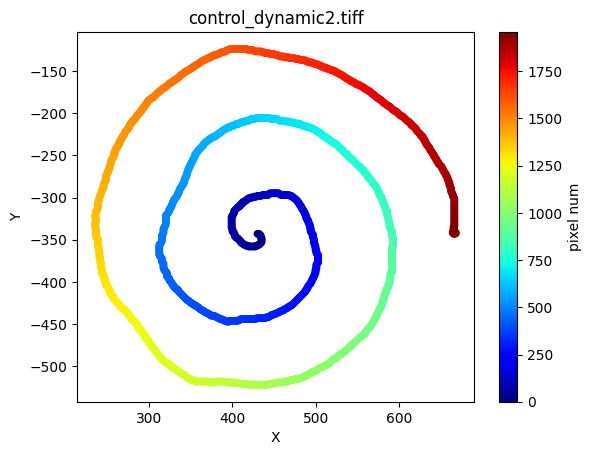

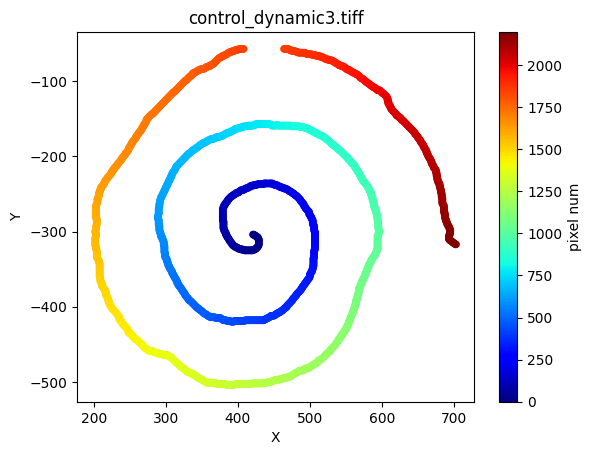

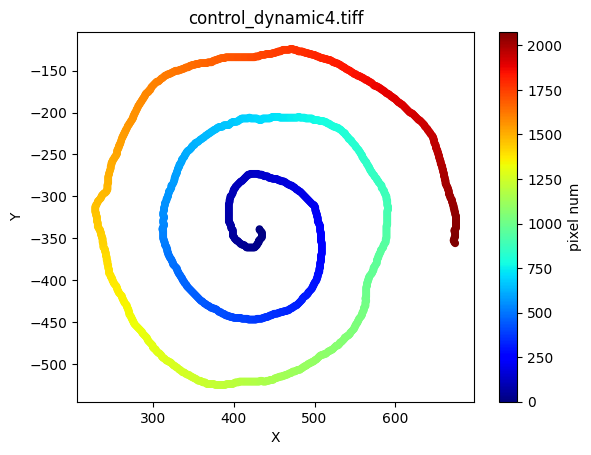

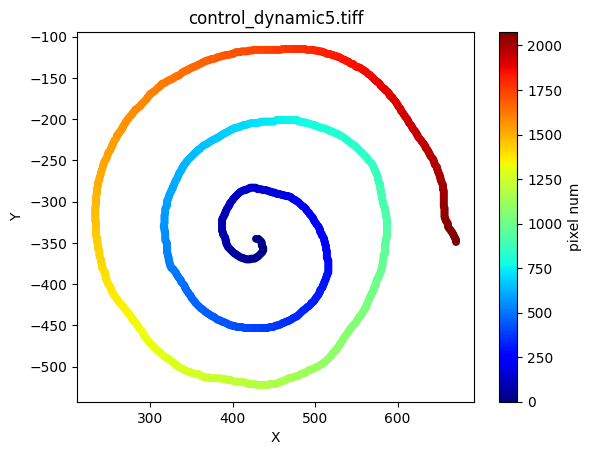

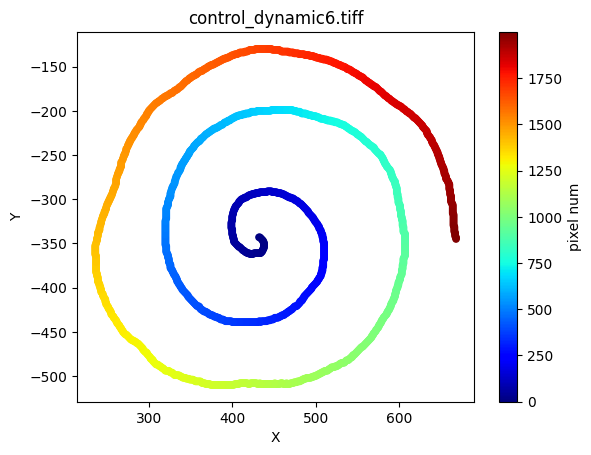

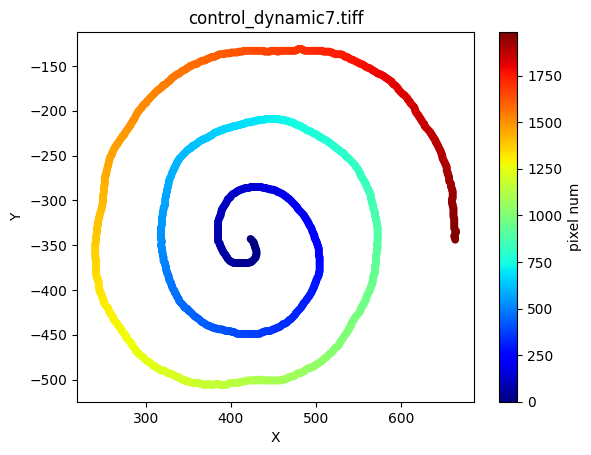

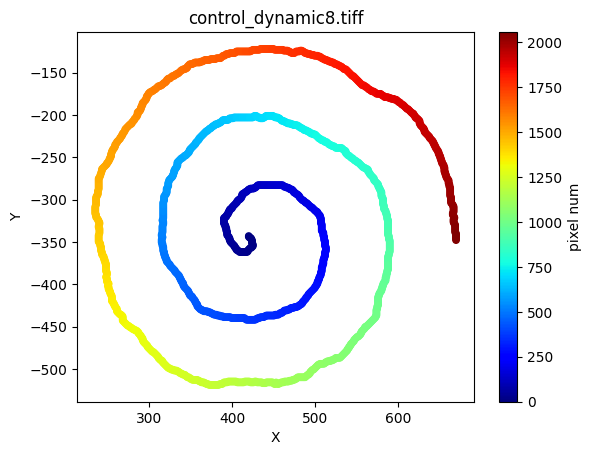

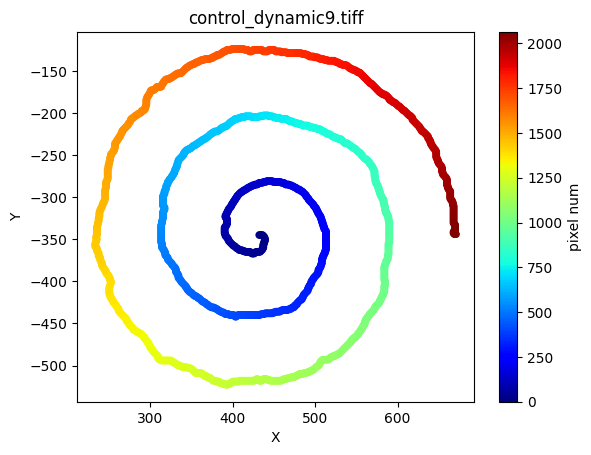

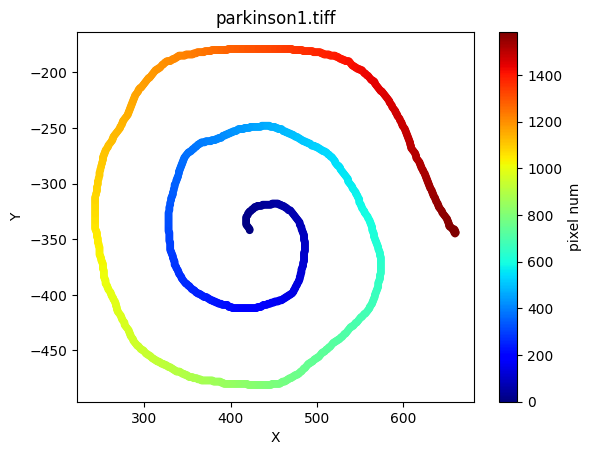

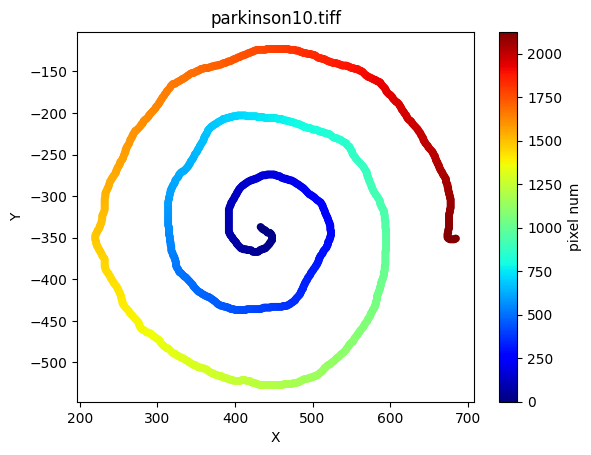

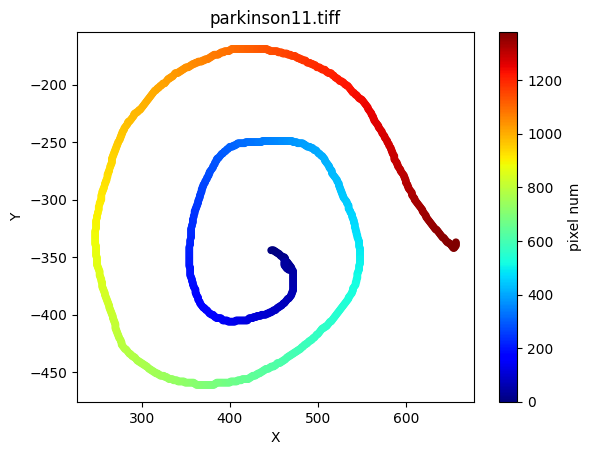

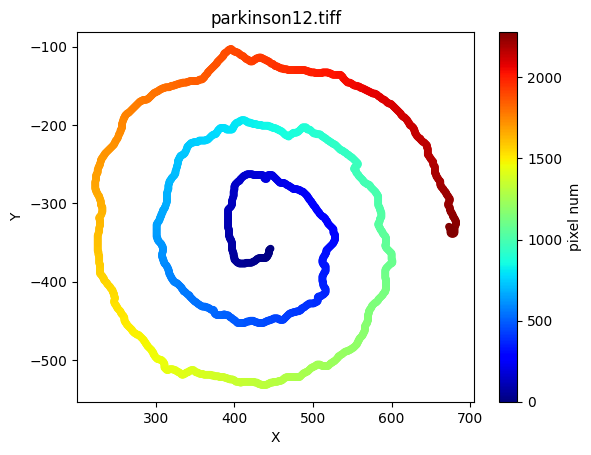

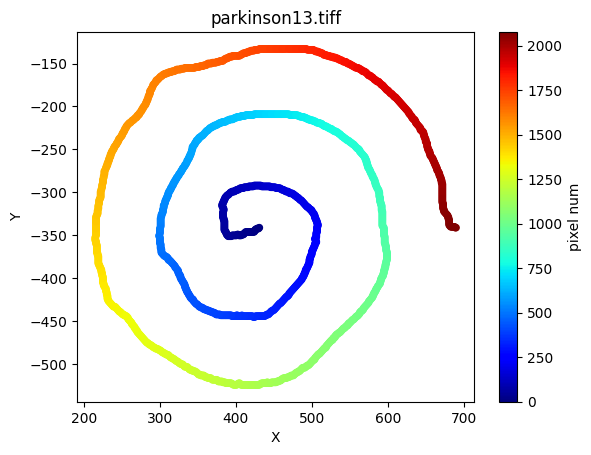

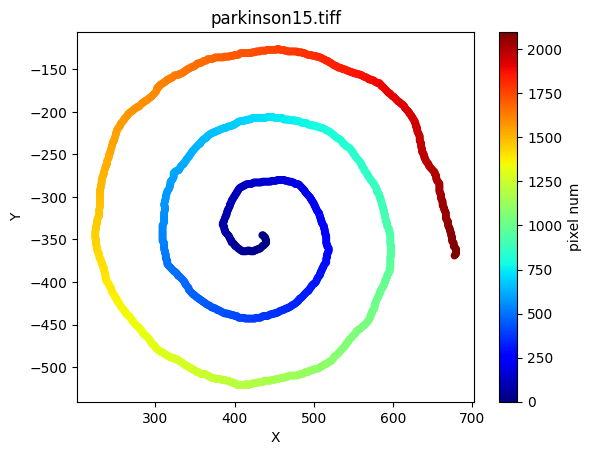

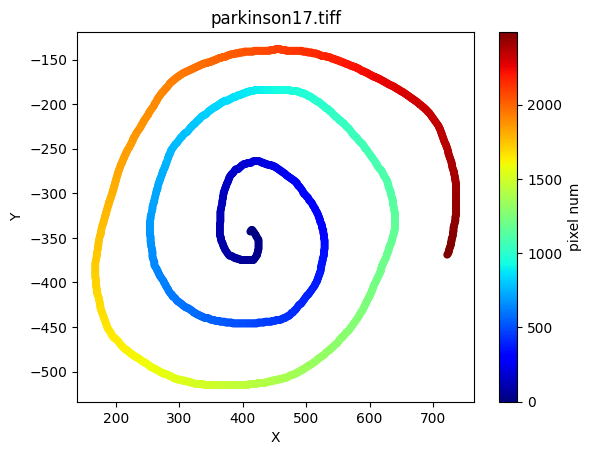

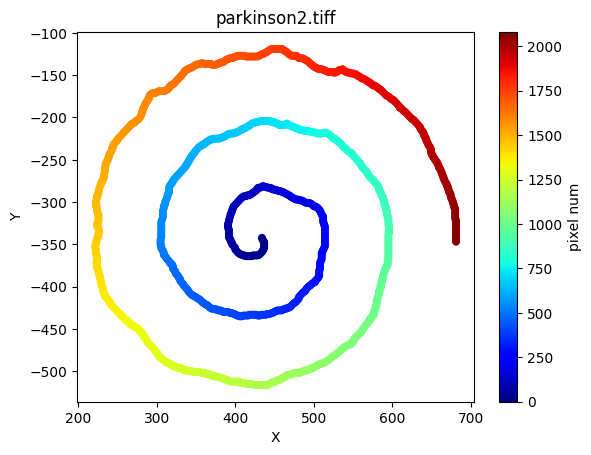

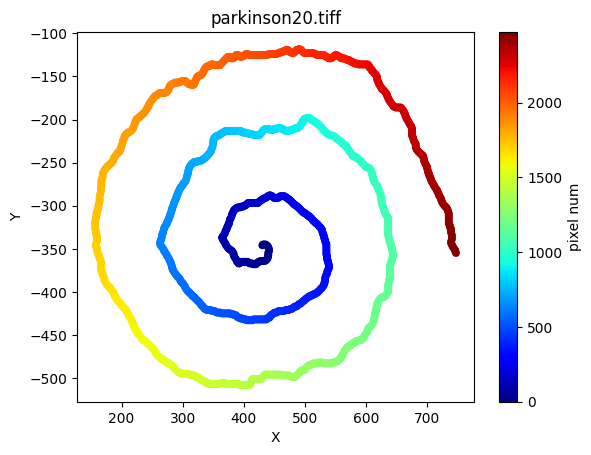

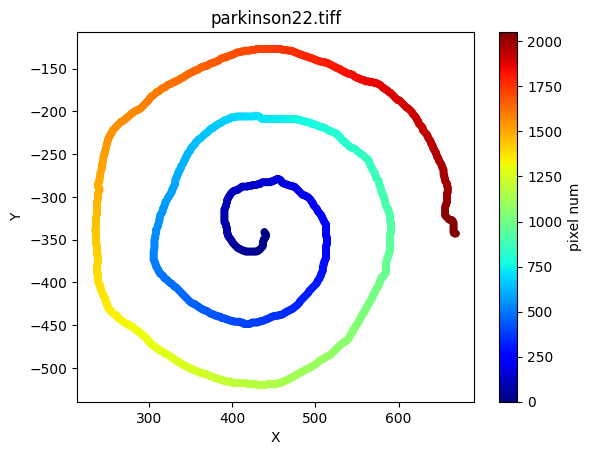

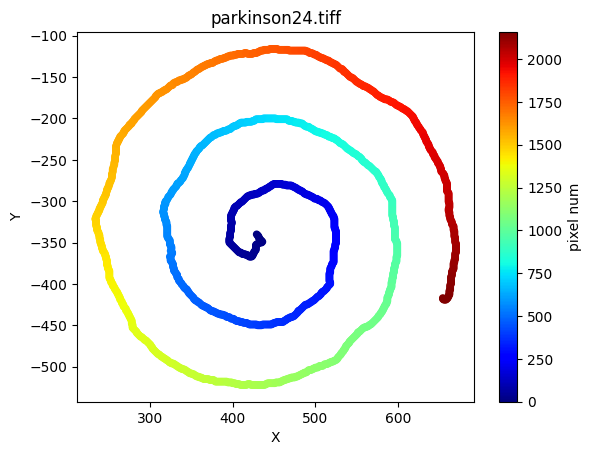

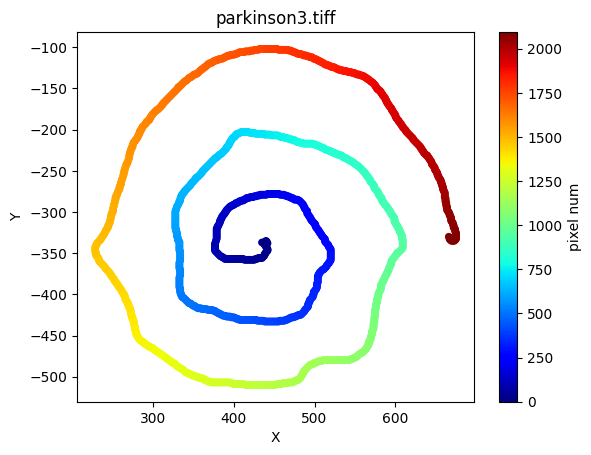

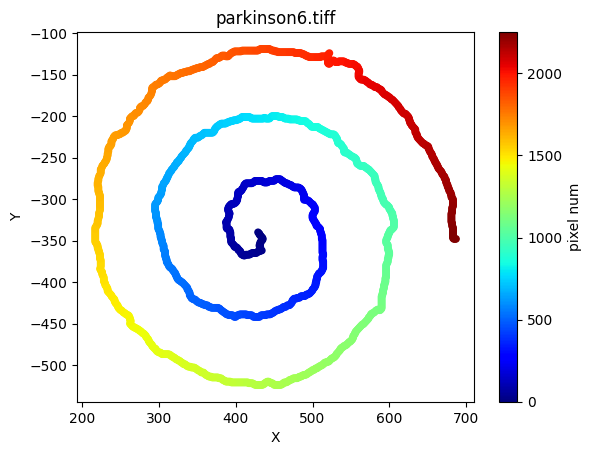

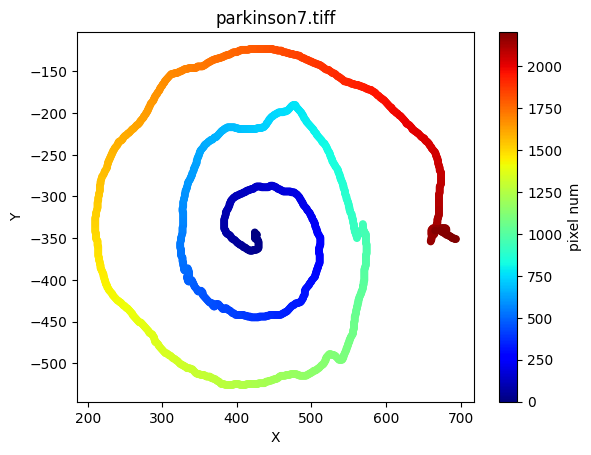

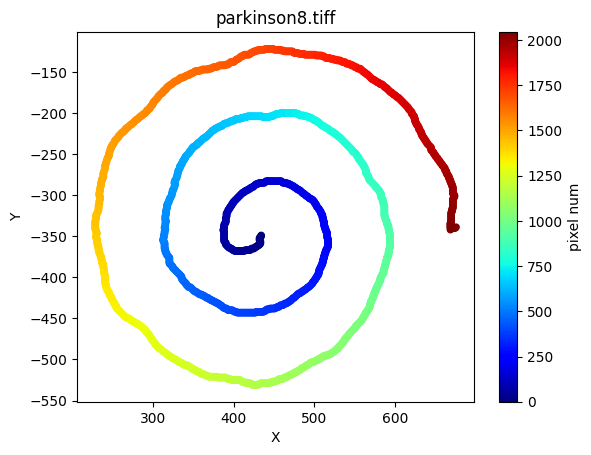

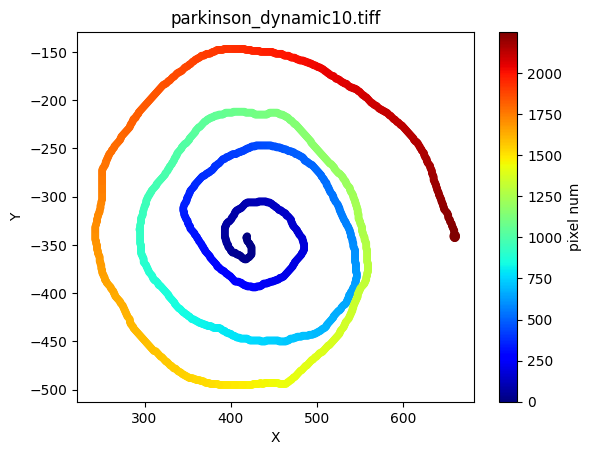

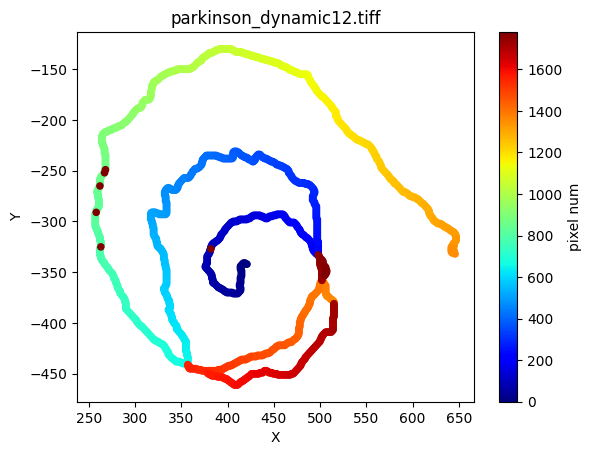

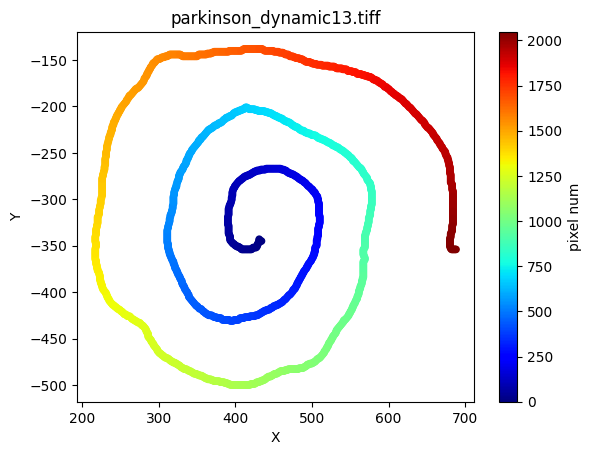

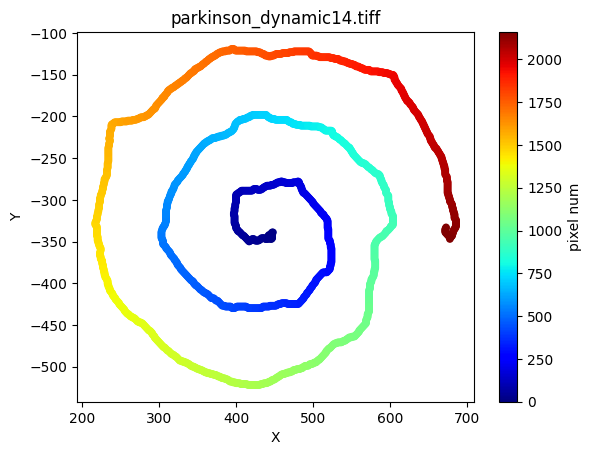

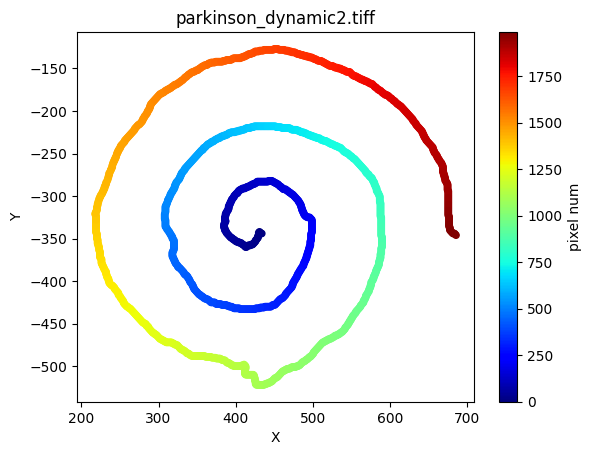

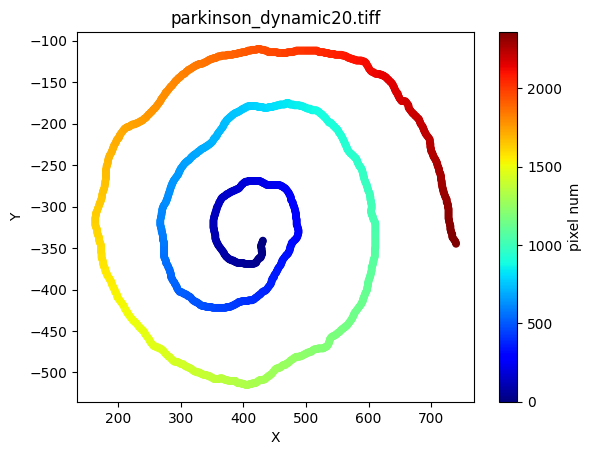

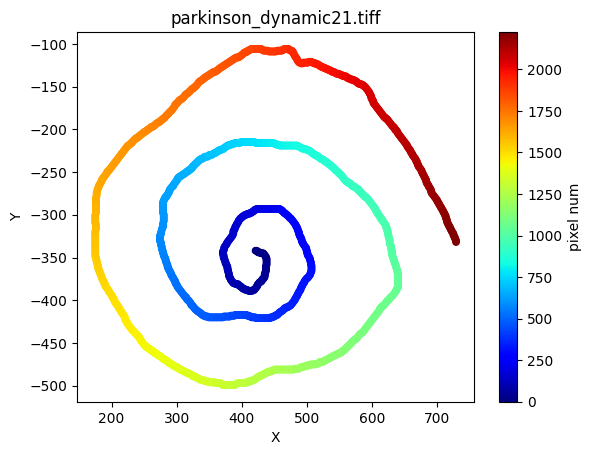

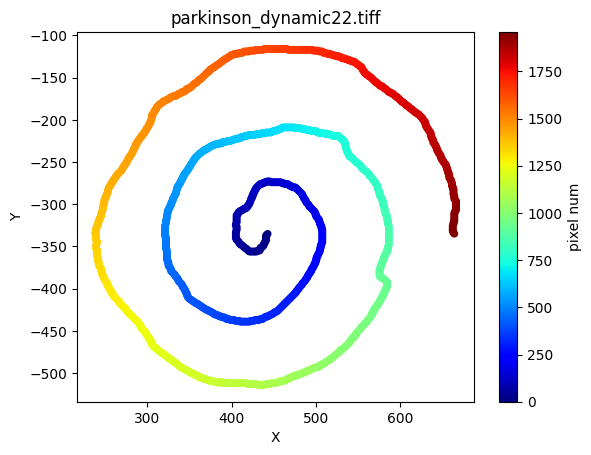

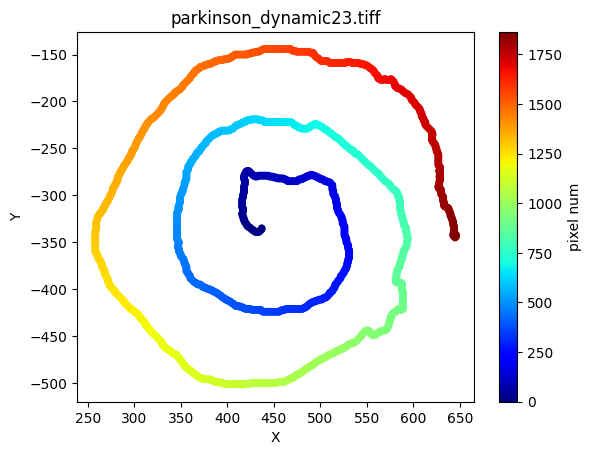

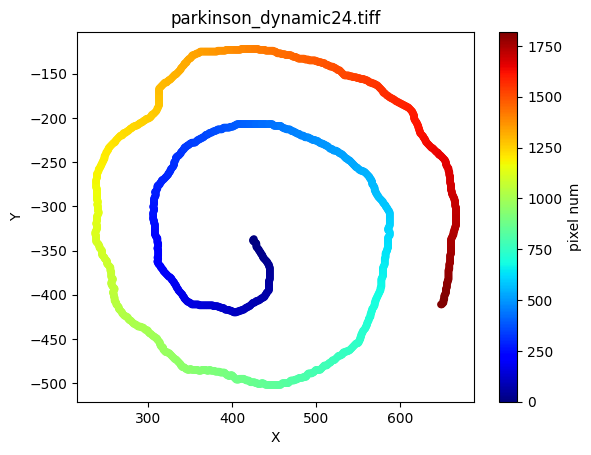

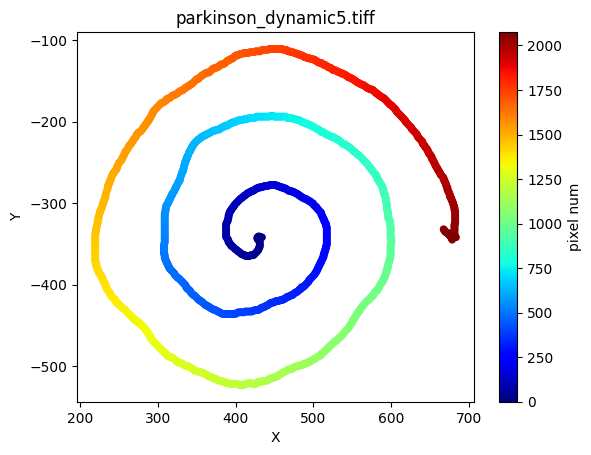

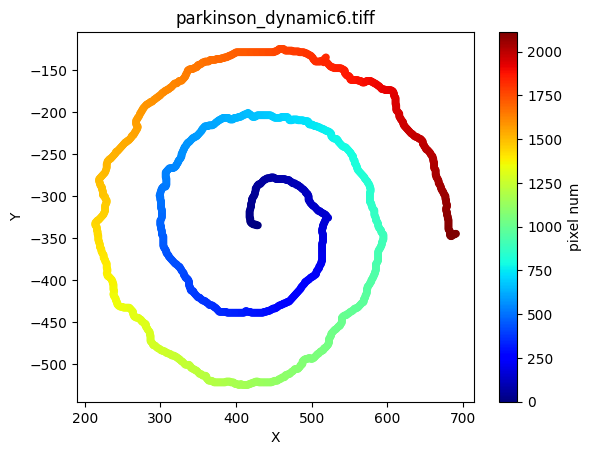

In [9]:
#trace_path
for trace_path, n in zip(all_paths, names):
    trace_path_time = np.array([[i[0], -i[1], j] for j, i in enumerate(trace_path)])
    
    plt.scatter(trace_path_time[:,0], trace_path_time[:,1], c=trace_path_time[:,2], s=20, cmap='jet')
    plt.colorbar(label='pixel num')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(n)
    plt.show()

## Closer look at static data

In [210]:
plt.figure(figsize=(10, 5))
static = {}
for i, j in zip(trace_distances_all, names):
    if True: #'dynamic' in j:
        color = 'red' if 'parkinson' in j else 'blue'
        static[j] = {}
        static[j]['original'] = i
        static[j]['resampled'] = signal.resample(i, 2500)
        #i = [k-index*27.5 for index, k in enumerate(i)]

        if True:
            # gaussian filtering
            for _ in range(1):
                pred = gaussian_filter1d(i, 30)
            static[j]['template_dist'] = signal.resample(pred, 2500)
        else:
            # lin reg
            x = np.array([k for k in range(len(i))]).reshape((-1, 1))
            reg = LinearRegression().fit(x, i)
            static[j]['params'] = (reg.coef_, reg.intercept_)
            pred = reg.predict(x)
            static[j]['template_dist'] = reg.predict(np.array([k for k in range(2500)]).reshape((-1, 1)))
        
        
        i = [k-l for k,l in zip(i, pred)]
        
        
        i = signal.resample(i, 2500)
        static[j]['data'] = i 
        static[j]['fft'] = np.fft.fft(i)
        plt.plot(i, c=color, alpha=0.5)
plt.title('Squared Distance - static')
plt.plot([0,2500], [0,0], 'k')
plt.ylim((-1e4, 1e4))
plt.show()

### Power Density Spectrum

In [11]:
plt.figure(figsize=(10, 5))
for i in static:
    p = 'red' if 'parkinson' in i else 'blue'
    tmp = [abs(k)**2 + 1 for k in static[i]['fft']]
    plt.plot([i for i in range(-1250, 1250)], tmp[1250:] + tmp[:1250], c=p)
plt.title('Power Density Spectrum - static')
#plt.yscale('log')
plt.ylim((1e3, 1e10))
plt.show()

### Autocorrelation 

Keep in mind, autocorrelation is the fourier transormation of the PDS.

The plot here is shifted...

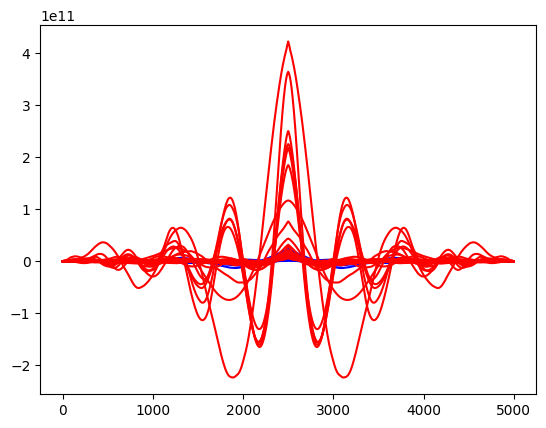

In [12]:
for i in static:
    p = 'red' if 'parkinson' in i else 'blue'
    #plt.scatter(static[i]['std'], static[i]['fft'][0], c=p)
    tmp = signal.correlate(static[i]['data'], static[i]['data'])
    plt.plot(tmp, c=p)
    #break

This is an approach to find two trivial statistics that make a separation of parkinson and control possible.

The std of the spiral-template is an intuitive feature that shows already being effective.
Also the fft(0) which is nothing but the sum of all points of spiral-template proves to be a valid feature.

The problem with both features is though that they depend on a template we do not have access to.

# Problems of the std

If we take a look at parkinson4.tiff we can see that there are small changes in direction that we can easily define as PD but that do not appear in the std... as a result we should take a look at the angle as well.

Text(0.5, 1.0, 'Squared Angle - static')

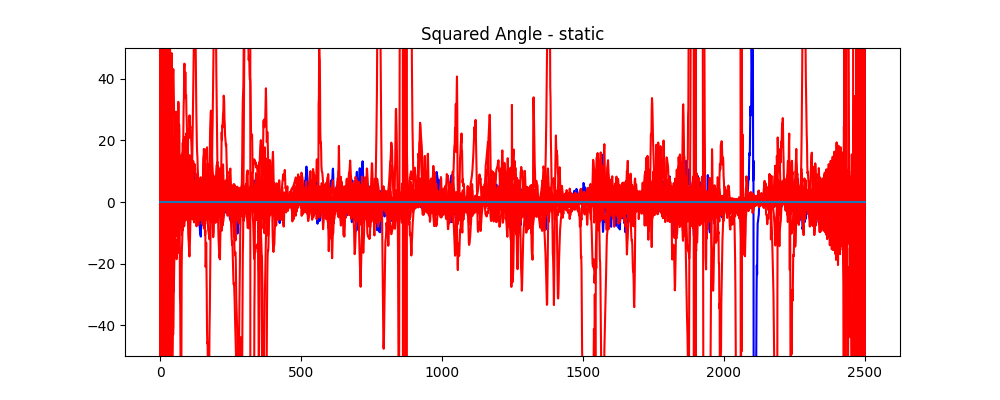

In [211]:


plt.figure(figsize=(10, 4))
for i, j in zip(trace_angle_continuous, names):
    if True:# 'dynamic' in j:
        color = 'red' if 'parkinson' in j else 'blue'
        #i = [k*k for k in i] 
        static[j]['angle'] = i
        i = signal.resample(i, 2500)
        
        box_pts = 0 #33
        #box = np.ones(box_pts)/box_pts
        i = gaussian_filter1d(i, 1) #signal.convolve(i, box, mode='valid')
        if True: #'parkinson' in j:
            temp = i
            box_pts = 0 #77
            #box = np.ones(box_pts)/box_pts
            for _ in range(1):
                temp = gaussian_filter1d(temp, 10) #signal.convolve(temp, box, mode='valid')
            #plt.plot([(temp[n+1] - temp[n])-(i[n+1] - i[n]) for n in range(len(temp)-1)], c=color)
            z = [(temp[n])-(i[n+box_pts//2]) for n in range(len(temp)-1)]
            z = [r*s for r, s in zip(z, static[j]['data'])]
            plt.plot(z, c=color)
            static[j]['angle_alt'] = z #[(temp[n+1] - temp[n])-(i[n+1+box_pts//2] - i[n+box_pts//2]) for n in range(len(temp)-1)]
            static[j]['template_angle'] = temp
            
        #plt.plot(i, c=color, alpha=0.5)
plt.ylim((-50, 50))
plt.plot([0, 2500], [0,0])
plt.title('Squared Angle - static')

In [212]:
x_, y_, t = [], [], []
name_ = 'parkinson11.tiff'
plt.figure()
for index, (a, d) in enumerate(zip(static[name_]['angle'], static[name_]['original'])):
    x_.append(np.cos(a)*np.sqrt(d))
    y_.append(-np.sin(a)*np.sqrt(d))
    t.append(index)
plt.scatter(x_, y_, c=t, s=10, cmap='jet')
plt.colorbar(label='pixel num')
plt.xlabel('X')
plt.ylabel('Y')
plt.title(name_)
plt.show()

In [213]:
x_, y_, t = [], [], []
name_ = 'parkinson11.tiff'
plt.figure()
for index, (a, d) in enumerate(zip(static[name_]['template_angle'], static[name_]['template_dist'])):
    x_.append(np.cos(a)*np.sqrt(d))
    y_.append(-np.sin(a)*np.sqrt(d))
    t.append(index)
plt.scatter(x_, y_, c=t, s=10, cmap='jet')
plt.colorbar(label='pixel num')
plt.xlabel('X')
plt.ylabel('Y')
plt.title(name_)
plt.show()

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_13920\2607437113.py:5: RuntimeWarning:

invalid value encountered in sqrt

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_13920\2607437113.py:6: RuntimeWarning:

invalid value encountered in sqrt



In [214]:
plt.figure(figsize=(10,5))
for i in static:
    p = 'red' if 'parkinson' in i else 'blue'
    x = static[i]['data'][:]
    x = np.gradient(x)
    static[i]['data_grad'] = x
    plt.plot(x, c=p)
plt.ylim((-500, 500))
    #y = np.std(static[i]['angle_alt'][50:-50])

(-500.0, 500.0)

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_13920\2216202575.py:19: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'blue' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_13920\2216202575.py:20: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'control1.tiff' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



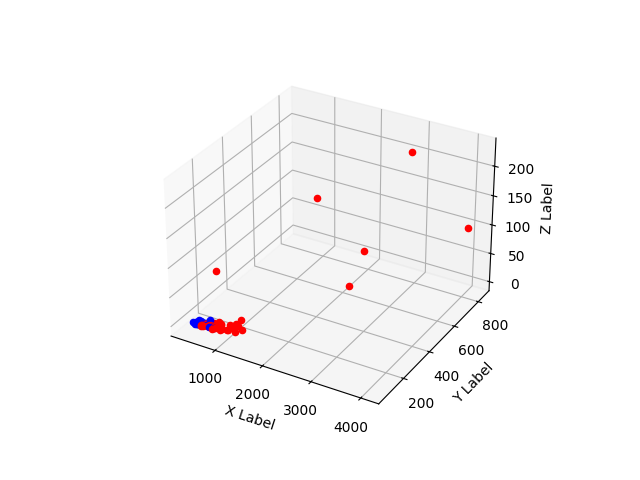

In [215]:
import pandas as pd

ax = None
plt.figure()
ax = plt.subplot(projection='3d') #figsize=(5,5))
#ax.set(zlim=(0,10))
df = pd.DataFrame()

for i in static:
    p = 'red' if 'parkinson' in i else 'blue'
    
    x = np.std(static[i]['data'][:])
    y = np.std(static[i]['data_grad'])
    z = np.std(static[i]['angle_alt'][50:-50])
    
    df.loc[i, 'x'] = x
    df.loc[i, 'y'] = y
    df.loc[i, 'z'] = z
    df.loc[i, 'c'] = p
    df.loc[i, 'name'] = i
    
    ax.scatter(x, y, z, c=p)
    
    t = i[-6:-5] if i[-7] in ['l', 'n'] else i[-7:-5]
    
    #ax.set_xlim((200,1250))
    #ax.set_ylim((60, 150))
    #ax.set_zlim((0,5))

    #plt.xscale('log')
    #plt.yscale('log')
    #plt.text(x*1.01, y*1.01, t)



ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

In [216]:
import plotly.express as px

fig = px.scatter_3d(df, 'x', 'y', 'z', color='c', hover_data='name')

fig.write_html("test_plot.html")

In [103]:
plt.figure(figsize=(5,5))
for i in static:
    p = 'red' if 'parkinson' in i else 'blue'
    
    x = np.std(static[i]['data'][:])
    #y = abs(np.quantile(static[i]['data'], 0.6))
    #y = np.quantile([abs(q) for q in static[i]['angle_alt'][100:]], 0.9)
    y = np.std(static[i]['angle_alt'][50:-50])
    #y = abs(np.mean(signal.correlate(static[i]['data'], static[i]['data'])))
    plt.scatter(x, y, c=p)
    
    t = i[-6:-5] if i[-7] in ['l', 'n'] else i[-7:-5]
    #if p == 'blue':
    plt.ylim((0, 3))
    plt.xlim((200,1250))
    
    #plt.xscale('log')
    #plt.yscale('log')
    plt.text(x*1.01, y*1.01, t)

plt.show()

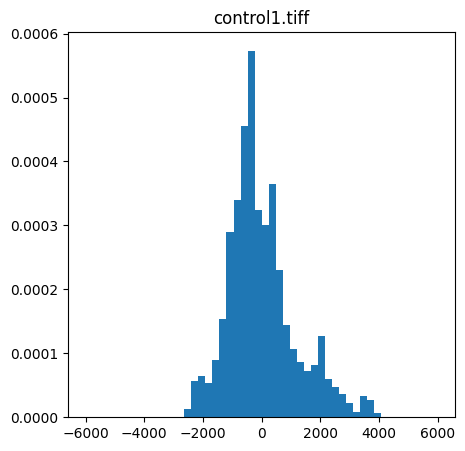

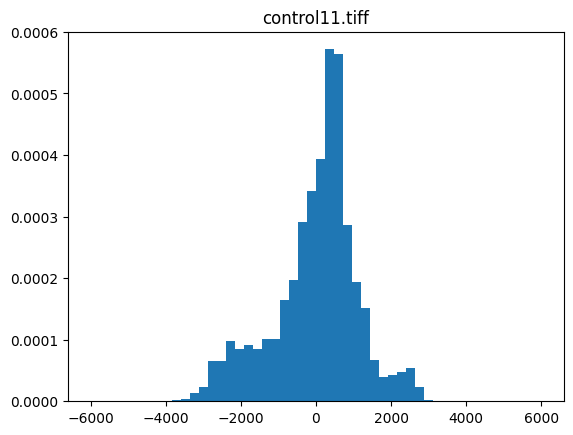

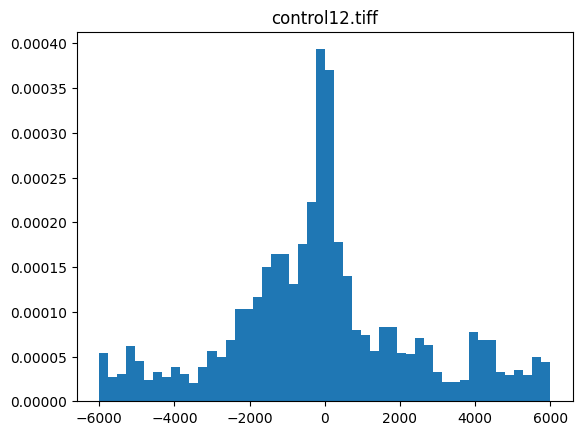

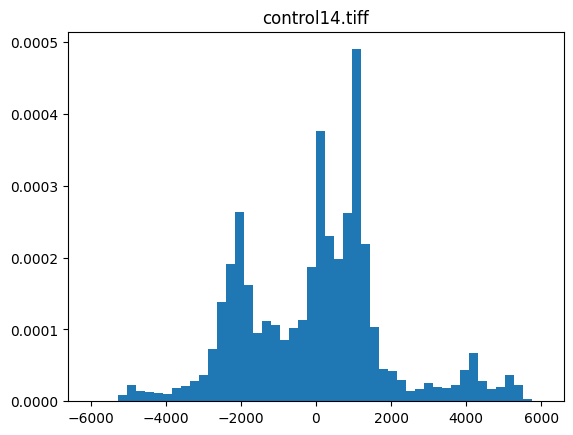

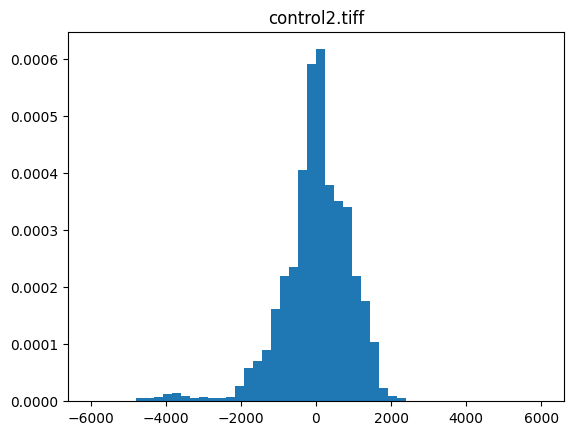

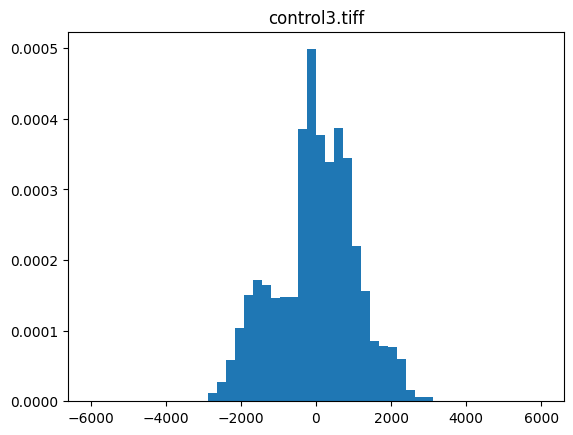

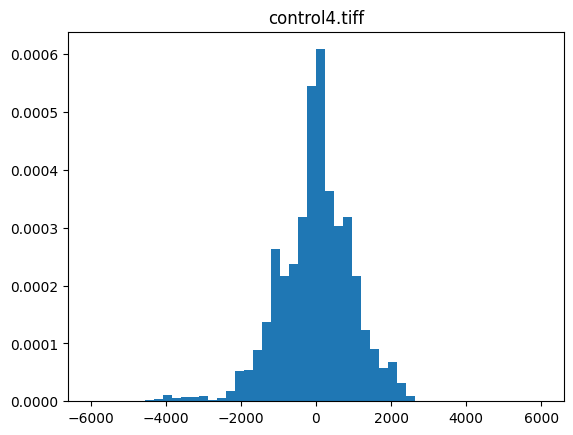

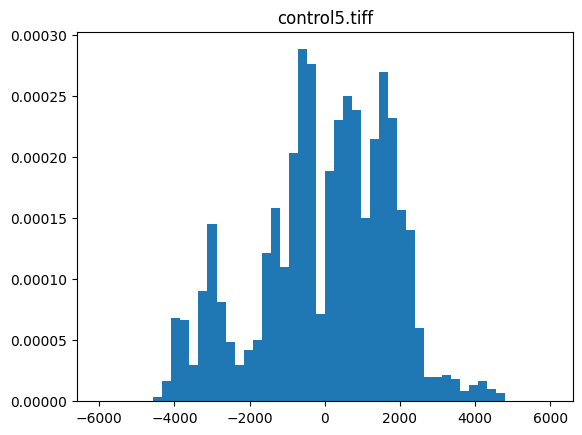

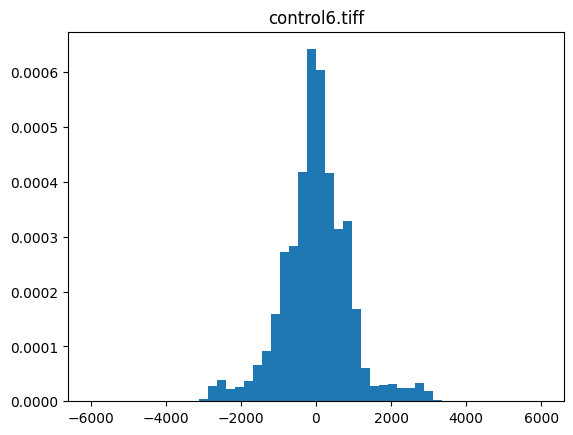

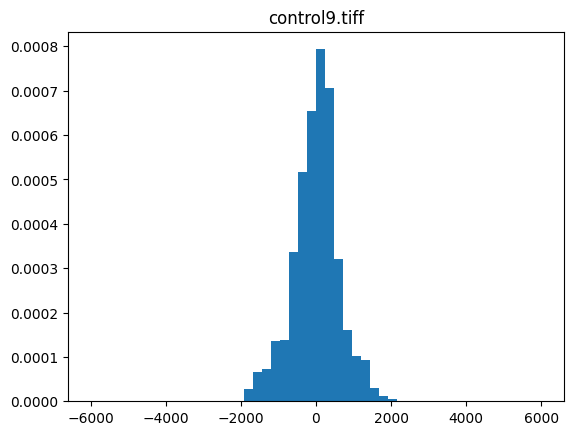

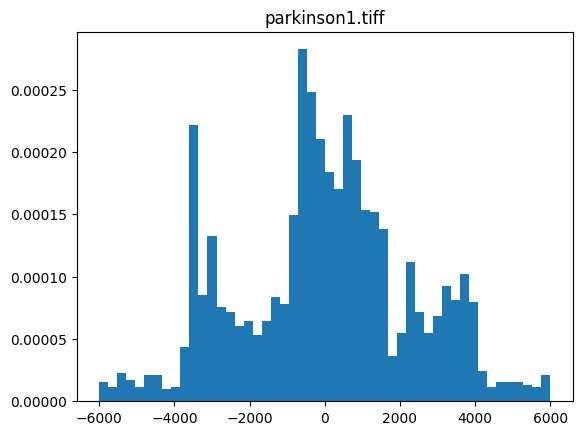

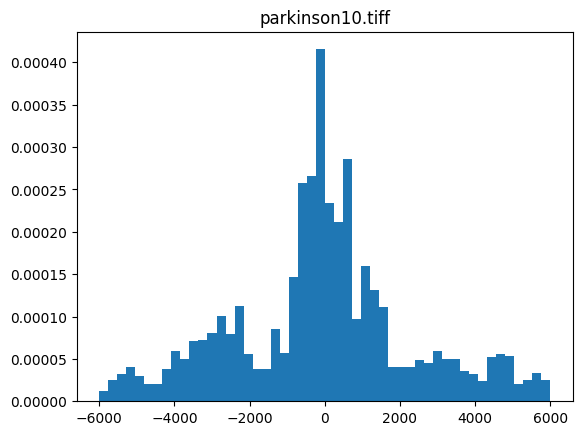

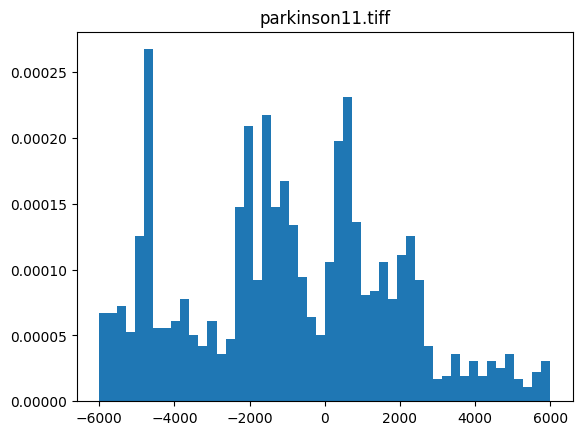

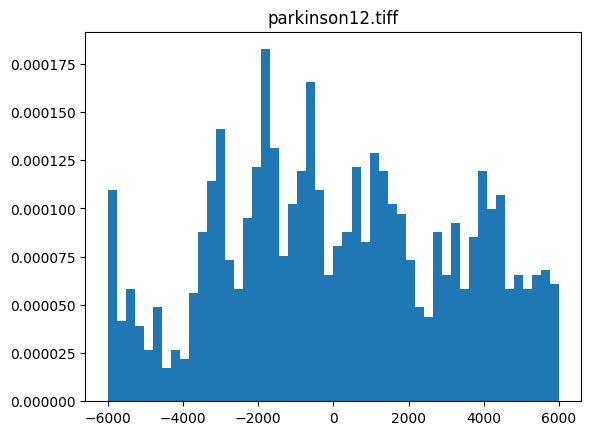

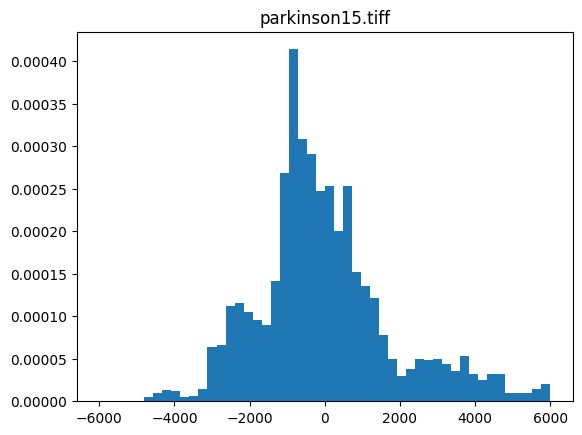

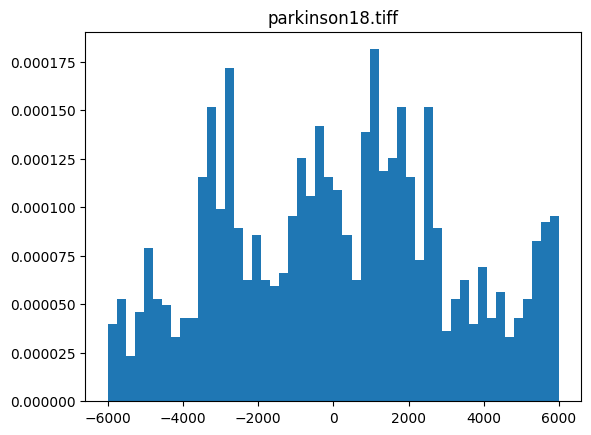

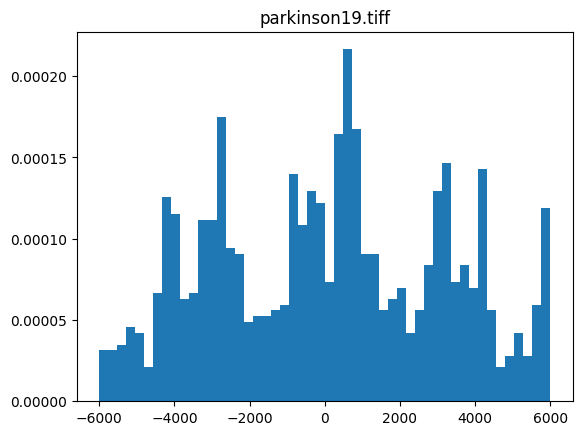

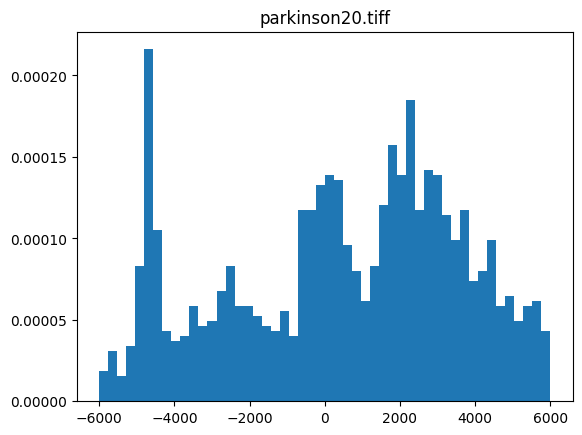

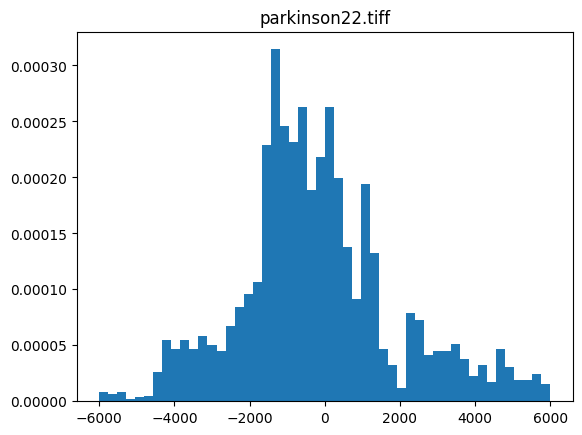

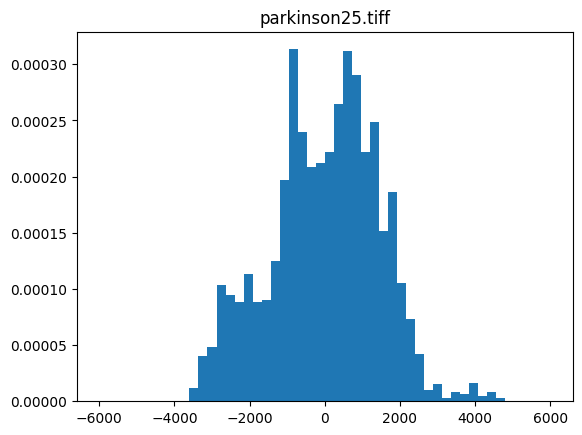

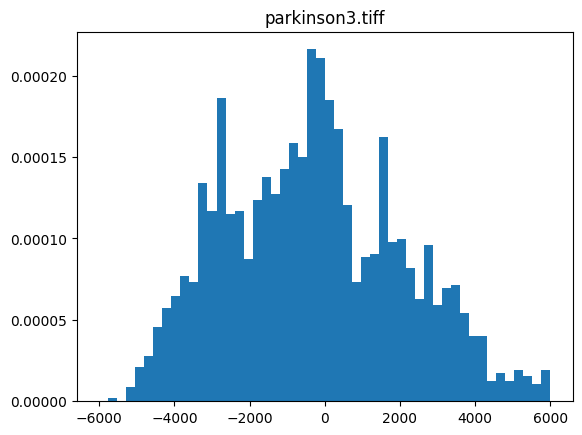

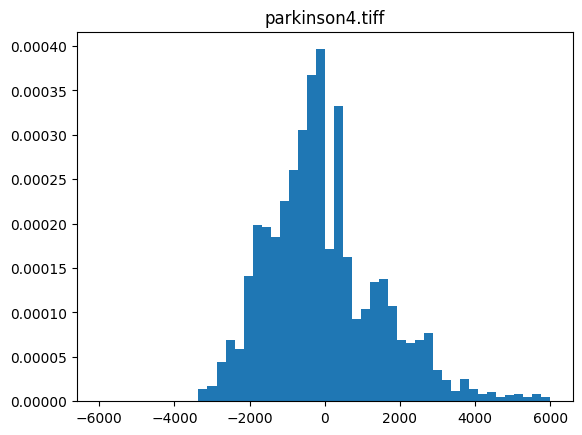

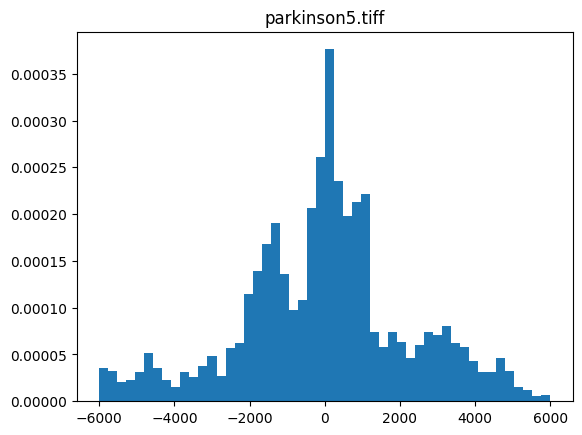

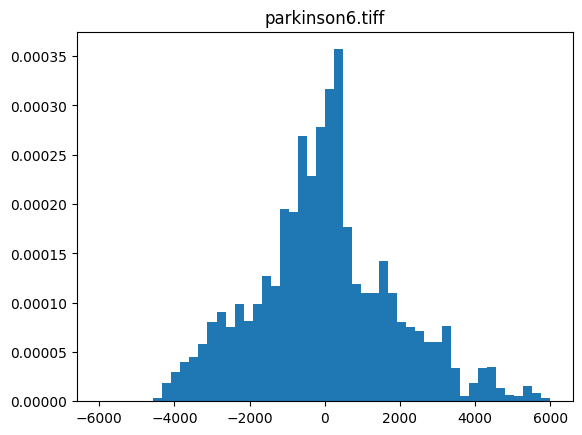

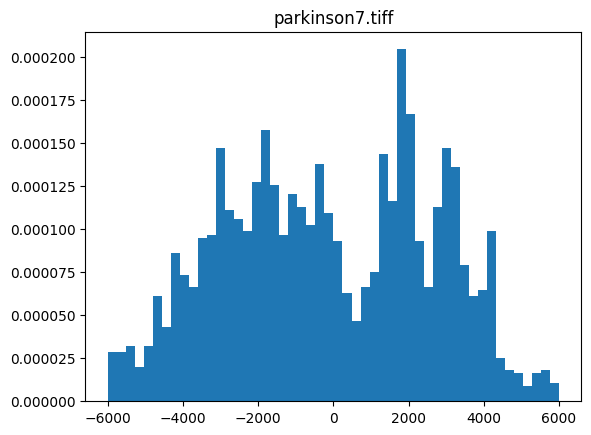

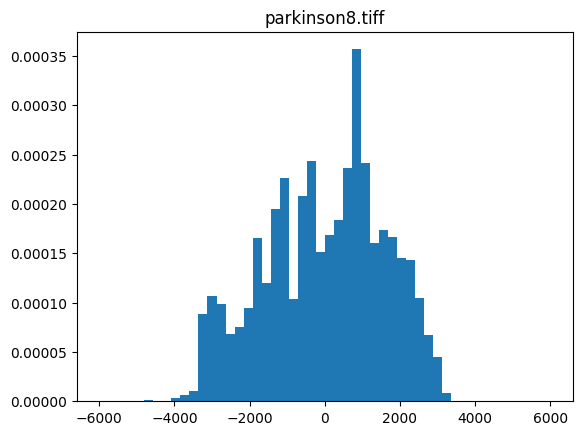

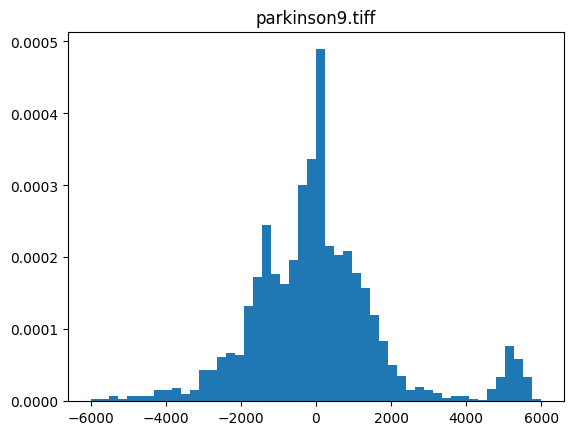

In [19]:
plt.figure(figsize=(5,5))
for i in static:
    p = 'red' if 'parkinson' in i else 'blue'
    
    # keep in mind, fft is complex 
    plt.hist(static[i]['data'], bins=50, density=True, range=(-6000, 6000))
    plt.title(i)
    plt.show()
    
    x = np.std(static[i]['data'])
    y = abs(np.quantile(static[i]['data'], 0.6))
    #y = abs(np.mean(signal.correlate(static[i]['data'], static[i]['data'])))
    #plt.scatter(x, y, c=p)
    
    t = i[-6:-5] if i[-7] in ['l', 'n'] else i[-7:-5]
    #if p == 'blue':
    
    #plt.text(x*1.01, y*1.01, t)
    #else:
     #   plt.text(x+50, y+50, '')
    
    #plt.yscale('log')
    

In [20]:
for i in static:
    #print(static[i]['params'])
    p = 'red' if 'parkinson' in i else 'blue'
    plt.scatter(static[i]['params'][0], static[i]['params'][1], c=p)
    #plt.ylim((-2000, 1000))
    #plt.xlim((26, 33))